<a href="https://colab.research.google.com/github/elangbijak4/kode-dinda-terbaru/blob/main/progres3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Masukkan nilai k: 6
Rekord yang terpilih:
Rekord 1: [ 25 175]
Rekord 2: [ 20 155]
Rekord 3: [ 20 150]
Rekord 4: [ 40 180]
Rekord 5: [ 30 165]
Rekord 6: [ 35 170]
ArrayK:
ArrayK 1: [array([ 25, 170])]
ArrayK 2: [array([ 28, 160])]
ArrayK 3: [None]
ArrayK 4: [array([ 40, 185])]
ArrayK 5: [array([ 28, 165])]
ArrayK 6: [array([ 35, 175])]
ArrayB: [array([ 25, 170]), array([ 28, 160]), None, array([ 40, 185]), array([ 28, 165]), array([ 35, 175])]


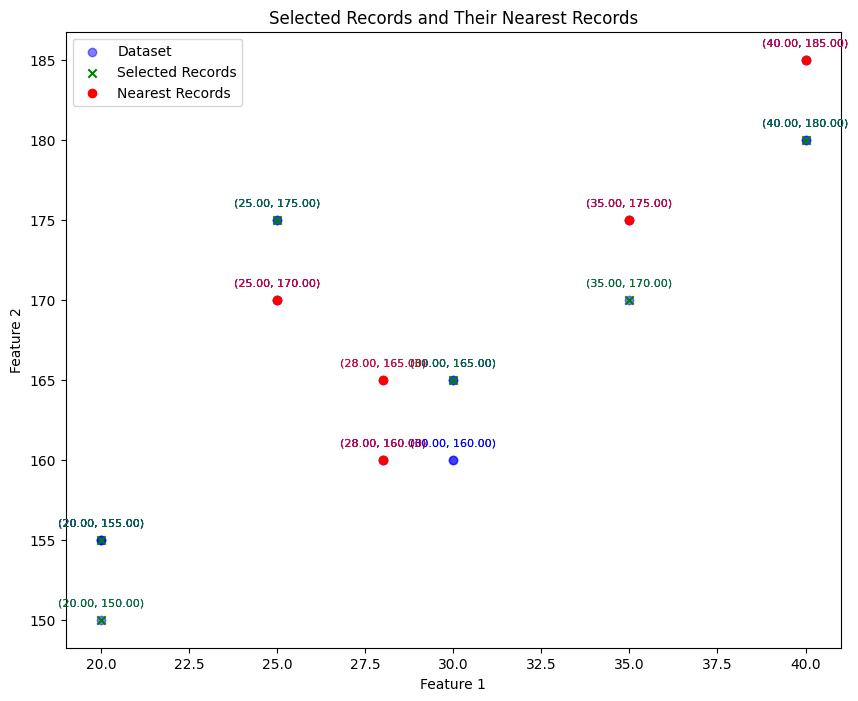

In [14]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

def preprocess_data(file_path):
    # Mengimpor data dari CSV
    data = pd.read_csv(file_path)

    # Menghapus kolom yang bukan bilangan (numerik)
    numeric_data = data.select_dtypes(include=[np.number])

    # Mengonversi DataFrame ke numpy array untuk memudahkan perhitungan
    return numeric_data.values

def find_nearest(record, dataset, selected_records):
    # Fungsi ini untuk mencari rekord terdekat dengan rekord yang diberikan
    min_dist = float('inf')
    nearest_record = None
    for r in dataset:
        if np.array_equal(r, record) or any(np.array_equal(r, sr) for sr in selected_records):
            continue
        dist = np.linalg.norm(np.array(record) - np.array(r))  # Menghitung jarak Euclidean
        if dist < min_dist:
            min_dist = dist
            nearest_record = r
    return nearest_record, min_dist

def plot_points(dataset, selected_records, nearest_records):
    plt.figure(figsize=(10, 8))

    # Plot semua titik dalam dataset
    plt.scatter(dataset[:, 0], dataset[:, 1], c='blue', label='Dataset', alpha=0.5)

    # Plot titik-titik yang dipilih
    selected_records = np.array(selected_records)
    plt.scatter(selected_records[:, 0], selected_records[:, 1], c='green', label='Selected Records', marker='x')

    # Plot titik-titik terdekat
    nearest_records = np.array([nr for nr in nearest_records if nr is not None])
    if nearest_records.size > 0:
        plt.scatter(nearest_records[:, 0], nearest_records[:, 1], c='red', label='Nearest Records', marker='o')

    # Menambahkan anotasi koordinat untuk setiap titik dalam dataset
    for i, point in enumerate(dataset):
        plt.annotate(f"({point[0]:.2f}, {point[1]:.2f})", (point[0], point[1]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='blue')

    # Menambahkan anotasi koordinat untuk titik-titik yang dipilih
    for i, point in enumerate(selected_records):
        plt.annotate(f"({point[0]:.2f}, {point[1]:.2f})", (point[0], point[1]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='green')

    # Menambahkan anotasi koordinat untuk titik-titik terdekat
    for i, point in enumerate(nearest_records):
        plt.annotate(f"({point[0]:.2f}, {point[1]:.2f})", (point[0], point[1]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='red')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Selected Records and Their Nearest Records')
    plt.legend()
    plt.show()

def main():
    # Langkah 0: Import dataset.csv menjadi data dan praproses data
    data = preprocess_data('dataset.csv')

    # Langkah 1: MULAI
    # Langkah 2: Input nilai k
    k = int(input("Masukkan nilai k: "))

    # Langkah 3: Buat array bernama arrayK yang ukurannya sama dengan k
    arrayK = [[None] for _ in range(k)]

    # Langkah 4: Buat array bernama arrayB yang ukurannya sama dengan k
    arrayB = [None] * k

    # Langkah 5: Pilih k rekord distinct di dalam data
    selected_records = []
    while len(selected_records) < k:
        record = random.choice(data)
        if record.tolist() not in [rec.tolist() for rec in selected_records]:
            selected_records.append(record)

    # Cetak k rekord yang terpilih
    print("Rekord yang terpilih:")
    for idx, record in enumerate(selected_records, 1):
        print(f"Rekord {idx}: {record}")

    # Langkah 6: For i=1 sampai k
    nearest_candidates = []
    for i in range(1, k + 1):
        record = selected_records[i - 1]

        # Langkah 6.1: Rekord ke-i mencari rekord yang terdekat dengannya di dalam belantara rekord data
        nearest_record, min_dist = find_nearest(record, data, selected_records)
        nearest_candidates.append((record.tolist(), nearest_record.tolist() if nearest_record is not None else None, min_dist))

    # Sort the candidates by their distance
    nearest_candidates.sort(key=lambda x: x[2])

    used_nearest_records = []
    for record, nearest_record, dist in nearest_candidates:
        if nearest_record is not None and nearest_record not in used_nearest_records:
            index = next(i for i, rec in enumerate(selected_records) if rec.tolist() == record)
            arrayB[index] = np.array(nearest_record)
            used_nearest_records.append(nearest_record)

    # Langkah 7: Menyalin isi setiap arrayB[i-1] ke arrayK[i-1][0]
    for i in range(k):
        arrayK[i][0] = arrayB[i]

    # Langkah 8: Cetak arrayK
    print("ArrayK:")
    for idx, record in enumerate(arrayK, 1):
        print(f"ArrayK {idx}: {record}")

    # Langkah 9: FINISH
    print("ArrayB:", arrayB)

    # Plotting the points
    plot_points(data, selected_records, arrayB)

if __name__ == "__main__":
    main()
